Importing the necessary packages

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib
import random
from sklearn.metrics import accuracy_score
import os
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import copy
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
import matplotlib.pyplot as plt 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the data 
df=pd.read_csv("/content/drive/MyDrive/train.csv",encoding="latin1")
#separating out the text and the labels
#the 0th column contains the sentiment corresponding to the column and the 5th column contains the text of the tweet
df=df.sample(frac=1)

In [ ]:
data_x=df.iloc[:90500,5]
data_y=df.iloc[:90500,0]

In [ ]:
#converting the labels
data_y=list(data_y)
#visualising the data we have
num_neutral=0
num_positive=0
num_negative=0
for i in data_y:
    if(i==2):
        num_neutral=num_neutral+1
    elif(i==4):
        num_positive=num_positive+1
    else:
        num_negative=num_negative+1


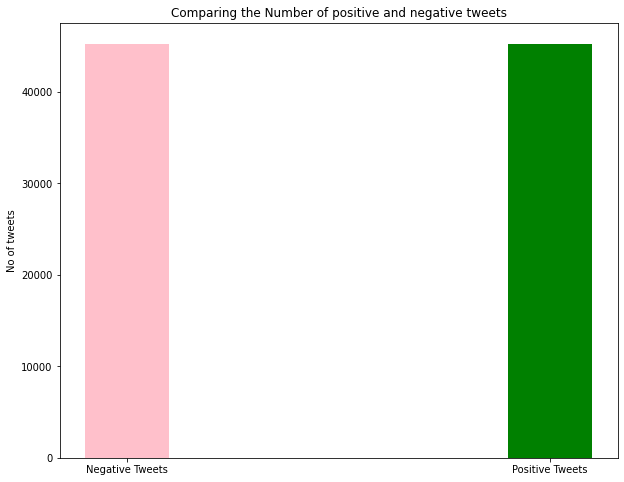

In [ ]:
x = ['Negative Tweets','Neutral Tweets','Positive Tweets']
fig = plt.figure(figsize = (10, 8)) 
plt.bar(x[0], num_negative, color ='pink', width = 0.2) 
#plt.bar(x[1], num_neutral, color ='pink', width = 0.2) 
plt.bar(x[2], num_positive, color ='green', width = 0.2) 
plt.xlabel("") 
plt.ylabel("No of tweets") 
plt.title("Comparing the Number of positive and negative tweets") 
plt.show() 

In [ ]:
#Analysing the train and test data and separating accordingly

In [ ]:
#downloading stopwords
import nltk
nltk.download('stopwords')
stops=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('words')
setofwords = set(words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## Function to clean the data for Further Processing 

In [ ]:
def clean_data(data):
    datas=data.values.tolist()
    for i in range(len(data)):
        s=datas[i]
        #converting to lower case for convinience
        s=s.lower().split()
        #now let us remove the stop words
        tes=list()
        for w in s:
            if "https" in w:
                continue
            if w not in stops:
                if w.isnumeric()==False:
                    if w[0]!='@' and w[0]!="#":
                        if len(w)>=2:
                            tes.append(w)
        tes=" ".join(tes)
        #replacing nums and other characters
        tes=re.sub(r'https?://[A-Za-z0-9./]+','',tes)
        tes=re.sub(r"[0-9^,!.\/''+-=]"," ",tes)
        tes=re.sub(r","," ",tes)
        tes=re.sub(r"!"," ",tes)
        tes=re.sub(r"#","",tes)
        tes=re.sub(r"$","",tes)
        tes=re.sub(r"%","",tes)
        tes=re.sub(r"^","",tes)
        tes=re.sub(r"&","",tes)
        tes=re.sub(r"\*","",tes)
        tes=re.sub(r"\("," ",tes)
        tes=re.sub(r"\)"," ",tes)
        tes=re.sub(r"_"," ",tes)
        tes=re.sub(r":","",tes)
        tes=re.sub(r"-"," ",tes)
        datas[i]=tes
    return datas

In [ ]:
data_X=clean_data(data_x)
print(len(data_X))

90500


In [ ]:
def get_label(datas):
    #datas=datas.values.tolist()
    ans=list()
    for i in range(len(datas)):
        if datas[i] == 4:
            ans.append(0)
        else:
            ans.append(1)
    return datas

In [ ]:
data_Y=get_label(data_y)

In [ ]:
cv = CountVectorizer(max_features = 2000)
data_x = cv.fit_transform(data_X).toarray()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_Y, test_size = 0.01, random_state=0)

In [ ]:
classifier_np = GaussianNB()
classifier_np.fit(X_train, y_train)
print(len(X_train))

89595


In [ ]:

y_pred = classifier_np.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc1=accuracy_score(y_test,y_pred)

0.7060773480662983
0.7060773480662983


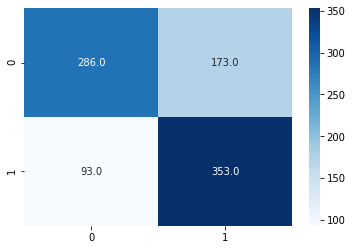

In [ ]:
print(acc1)
import seaborn as sns
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".1f")
from sklearn.metrics import f1_score
f11=f1_score(y_test,y_pred,average='micro')
print(f11)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.7491712707182321
0.7490229566997866


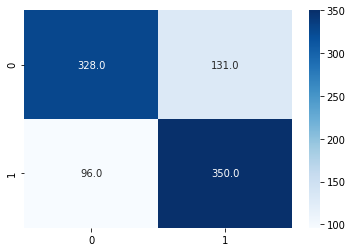

In [ ]:
y_pred = model.predict(X_test)
acc2=accuracy_score(y_test,y_pred)
print(acc2)
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".1f")
from sklearn.metrics import f1_score
f12=f1_score(y_test,y_pred,average='macro')
print(f12)

0.6983425414364641


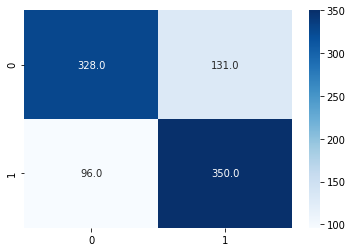

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)
pred=classifier_dt.predict(X_test)
acc3=accuracy_score(y_test,pred)
print(acc3)
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".1f")


In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.7314917127071823


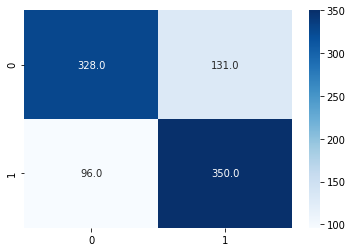

In [ ]:
pred=classifier_rf.predict(X_test)
acc4=accuracy_score(y_test,pred)
print(acc4)
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".1f")


In [ ]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('rff', RandomForestClassifier(n_estimators=10)))
level0.append(('gnb',GaussianNB()))
level0.append(('l',LogisticRegression(max_iter=2000)))
model = StackingClassifier(estimators=level0, final_estimator=LogisticRegression(max_iter=2000), cv=4)

0.7701657458563536


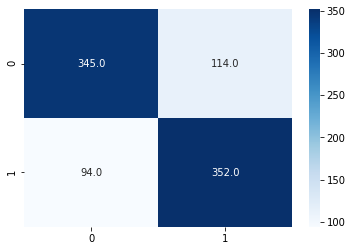

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc5=accuracy_score(y_test,y_pred)
print(acc5)
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".1f")


In [ ]:
print(acc2)

In [ ]:
model.fit(data_x,data_Y)

StackingClassifier(cv=4,
                   estimators=[('rff',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                       

In [ ]:
dff=pd.read_csv("/content/drive/MyDrive/Covishield_tweets.csv",encoding="latin1")


In [ ]:
test_x=dff.iloc[:,4]
test_x=clean_data(test_x)
cvv = CountVectorizer(max_features = 2000)
test_x = cvv.fit_transform(test_x).toarray()

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
print(y_pred)
#converting the labels
data_y=list(y_pred)
#visualising the data we have
num_neutral=0
num_positive=0
num_negative=0
for i in data_y:
    if(i==2):
        num_neutral=num_neutral+1
    elif(i==4):
        num_positive=num_positive+1
    else:
        num_negative=num_negative+1

[0 0 4 ... 4 4 4]


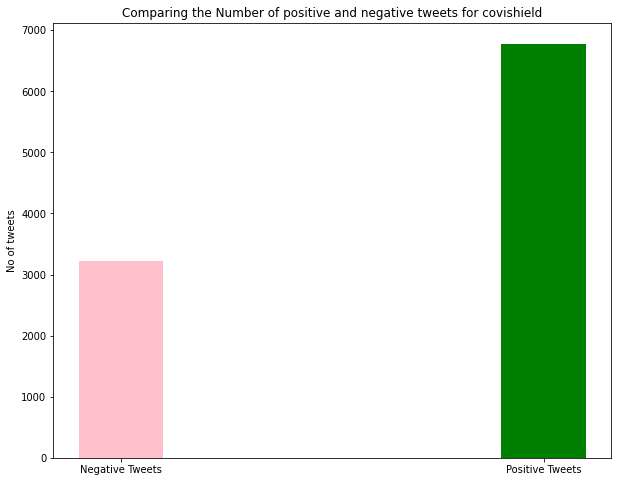

In [ ]:
x = ['Negative Tweets','Neutral Tweets','Positive Tweets']
fig = plt.figure(figsize = (10, 8)) 
plt.bar(x[0], num_negative, color ='pink', width = 0.2) 
#plt.bar(x[1], num_neutral, color ='pink', width = 0.2) 
plt.bar(x[2], num_positive, color ='green', width = 0.2) 
plt.xlabel("") 
plt.ylabel("No of tweets") 
plt.title("Comparing the Number of positive and negative tweets for covishield") 
plt.show() 

In [ ]:
test_x=dff.iloc[:,4]
test_x=clean_data(test_x)

['india', 'send', '', '', '', '', '', '', '', '', 'covishield', 'vaccines', 'srilanka', '', '', 'th', 'january', '', 'sl', 'president', 'gotabaya', 'rajapakse', 'announced', 'event', '']


In [ ]:
positive=list()
negative=list()
